In [3]:
import pandas as pd


In [4]:
df_booking = pd.read_csv("datasets/fact_bookings.csv")
df_hotel = pd.read_csv("datasets/dim_hotels.csv")
df_room = pd.read_csv("datasets/dim_rooms.csv")
df_date = pd.read_csv("datasets/dim_date.csv")
df_agg_booking = pd.read_csv("datasets/fact_aggregated_bookings.csv")
df_booking.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [6]:
df_booking.shape

(134590, 12)

In [8]:
df_booking.dtypes

booking_id            object
property_id            int64
booking_date          object
check_in_date         object
checkout_date         object
no_guests            float64
room_category         object
booking_platform      object
ratings_given        float64
booking_status        object
revenue_generated      int64
revenue_realized       int64
dtype: object

In [10]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [12]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [15]:
df_booking.revenue_generated.max()

np.int64(28560000)

In [25]:
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

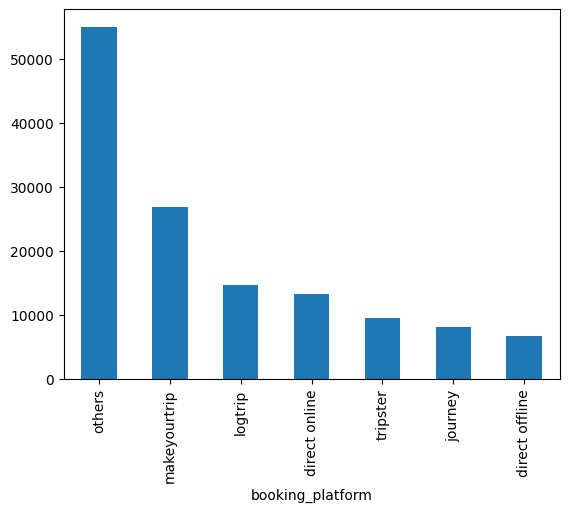

In [24]:
df_booking.booking_platform.value_counts().plot(kind = 'bar')

<Axes: ylabel='booking_platform'>

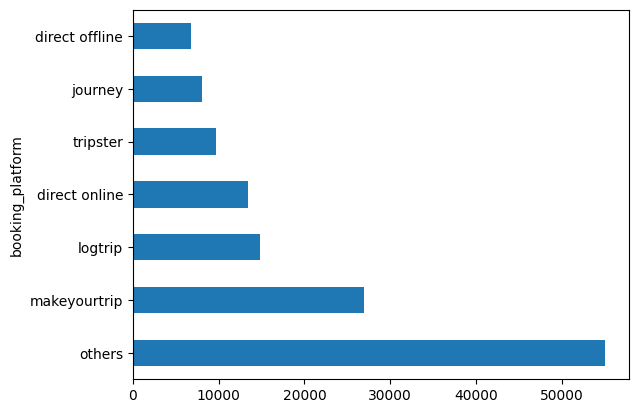

In [27]:
df_booking.booking_platform.value_counts().plot(kind = 'barh')

In [29]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [31]:
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [44]:
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [46]:
df_hotel.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

In [55]:
df_agg_booking.dtypes

property_id              int64
check_in_date           object
room_category           object
successful_bookings      int64
capacity               float64
dtype: object

In [51]:
df_agg_booking.groupby("property_id").successful_bookings.sum().sort_values(ascending = False)

property_id
16559    7338
18562    7333
16563    7211
18560    6638
18561    6458
17563    6337
17559    6142
19560    6079
17560    6013
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5053
16562    4820
18563    4737
19559    4729
16560    4693
18558    4475
16561    4418
19558    4400
17564    3982
17562    3424
16558    3153
Name: successful_bookings, dtype: int64

In [56]:
# Exercise-3. Find out days on which bookings are greater than capacity
df_agg_booking[df_agg_booking["successful_bookings"]>df_agg_booking["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [64]:
df_agg_booking.capacity.max()

np.float64(50.0)

In [78]:
# Find out properties that have highest capacity
df_agg_booking[df_agg_booking.capacity == 50.0]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


In [86]:
df_booking = df_booking[df_booking["no_guests"]>0]

In [87]:
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [92]:
std, avg = df_booking.revenue_generated.std(),df_booking.revenue_generated.mean()

In [100]:
limit_high = avg+std*3
limit_high

np.float64(294498.50173207896)

In [94]:
limit_low = avg-std*3

In [96]:
df_booking[df_booking.revenue_generated> limit_high]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [98]:
df_booking = df_booking[df_booking.revenue_generated < limit_high]
df_booking

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [99]:
df_booking.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [104]:
limit_high_realized = df_booking.revenue_realized.mean() + df_booking.revenue_realized.std()*3
limit_high_realized

np.float64(33479.358661845814)

In [107]:
# it seems realized revenue has outlier, but room-type are all RT4--presidential
df_booking[df_booking.revenue_realized > limit_high_realized]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [109]:
# so let's check the outlier of presidential roomtype, no outlier if consideirng in this context.
df_booking[df_booking.room_category	== "RT4"].revenue_realized.describe()


count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [111]:
23439+9048*3

50583

In [115]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [121]:
# Exercise-1. In aggregate bookings find columns that have null values.
# Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)
df_agg_booking[df_agg_booking.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [123]:
df_agg_booking.capacity.median()

np.float64(25.0)

In [125]:
df_agg_booking.capacity.fillna(25,inplace = True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_17880\3765224026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_booking.capacity.fillna(25,inplace = True)


In [130]:
df_agg_booking.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [ ]:
 # In aggregate bookings find out records that have successful_bookings value greater than capacity. 
# Filter those records

In [132]:
df_agg_booking[df_agg_booking.successful_bookings >df_agg_booking.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [133]:
df_agg_booking.shape

(9200, 5)

In [136]:
df_agg_booking = df_agg_booking[df_agg_booking.successful_bookings <= df_agg_booking.capacity]
df_agg_booking.shape

(9194, 5)

In [137]:
df_agg_booking

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [5]:
df_agg_booking['occ_pct'] = df_agg_booking.successful_bookings/df_agg_booking.capacity
df_agg_booking


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [6]:
df_agg_booking['occ_pct'] = df_agg_booking['occ_pct'].apply(lambda x: round(x*100,2))
df_agg_booking

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [146]:
df_agg_booking

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.222222
9196,16559,31-Jul-22,RT4,13,18.0,72.222222
9197,17558,31-Jul-22,RT4,3,6.0,50.000000
9198,19563,31-Jul-22,RT4,3,6.0,50.000000


In [19]:
df_agg_booking.groupby("room_category").occ_pct.mean().round(2)


room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [15]:
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [29]:
df = pd.merge(df_agg_booking,df_room,left_on = "room_category", right_on = "room_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [22]:
df.groupby("room_class").occ_pct.mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [31]:
df.drop("room_id",axis = 1,inplace = True)


In [32]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


Average occupancy per city


In [35]:
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [39]:
df1 = pd.merge(df,df_hotel,on = "property_id")

In [40]:
c

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi
...,...,...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi
9196,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Grands,Luxury,Mumbai
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential,Atliq Palace,Business,Bangalore


<Axes: ylabel='city'>

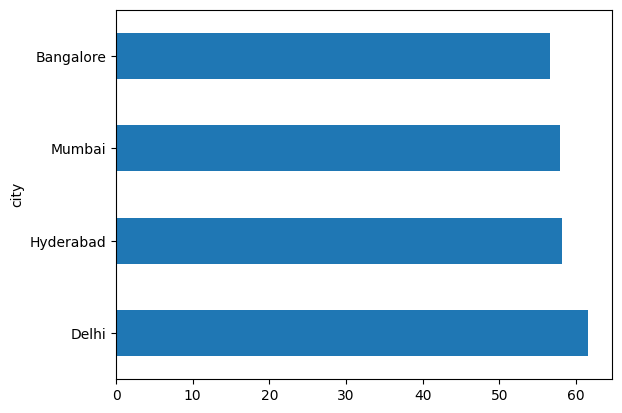

In [45]:
df1.groupby("city").occ_pct.mean().round(2).sort_values(ascending = False).plot(kind = "barh")

In [46]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


when is occ_pct better, weekday or weekend?

In [48]:
df2 = pd.merge(df1,df_date, left_on = "check_in_date",right_on = "date")

In [50]:
df2.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [52]:
df2.groupby("day_type").occ_pct.mean()

day_type
weekeday    50.903780
weekend     72.393432
Name: occ_pct, dtype: float64

in the month of june , what is occupancy rate for differnet city

In [58]:
df2['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [62]:
df_june = df2[df2['mmm yy'] == "Jun 22"]

In [63]:
df_june.groupby("city").occ_pct.mean()

city
Bangalore    56.578552
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Name: occ_pct, dtype: float64